DSCI 100: Individual Project

<h2>(1) Data Description</h2>

The project uses two related datasets, players.csv and sessions.csv

players.csv: A list of all unique players, including data about each player.

sessions.csv: A list of individual play sessions by each player, including data about the session.

players.csv

Number of observations(rows): 196

Number of variables(columns): 7

| Variable Name | Type | Description |
| ------------- | ---- | ----------- |
| Experience | chr | Describing a player’s experience level |
| Subscribe | lgl | Player subscribed or not to the research server | 
| HashedEmail | chr | Representing an anonymized player ID |
| Played_hours | dbl | How many total hours the player has played |
| Name | chr | Player’s nickname in game |
| Gender | chr | Player's gender |
| Age | dbl | Player’s age in years |

sessions.csv

Number of observations(rows): 1535

Number of variables(columns): 5

| Variable Name | Type | Description |
| ------------- | ---- | ----------- |
| hashedEmail | chr | Representing an anonymized player ID |
| start_time | chr | Time when the session was created(human-readable) |
| end_time | chr | Time when the session was end(human-readable) |
| original_start_time | dbl | Unix timestamp (milliseconds) of session start |
| original_end_time | dbl | Unix timestamp (milliseconds) of session end |

Visible Issues: The categories of experience is undefined categorical scale. The data may contain self-reported bias.

Potential Issues: The categories of played_hours or age may contain missing value(NA) or extreme value. 

<h2>(2) Questions</h2>

broad question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

specific question: Can we predict whether a player subscribes to the newsletter (subscribe) based on their age, and total hours played in the players.csv dataset?

In my question, the target(Response variable) is subscribe, which return true or false, and the predictor are age and played_hours. 
The variable age represents each player’s age in years, which may influence their likelihood of subscribing due to different levels of interest or experience with research projects.
The variable played_hours measures how many total hours a player has spent in game, which reflects their engagement.

The players.csv dataset contains the response variable and the chosen predictors (age and played_hours). First we need to split the data to training dataset and testing dataset. Second we use step_scale() and step_center() to standardize numerical variables(age, played_hours), so that they are on the same scale. Finally, we build a classification model to predict the target variable subscribe based on two predictors.

<h2>(3) Exploratory Data Analysis and Visualization</h2>

<h3>Load data</h3>

In [11]:
library(tidyverse)
library(tidymodels)

In [12]:
players_url <- "https://raw.githubusercontent.com/Jmmchai/individual-planning-stage/refs/heads/main/players.csv"
players <- read_csv(players_url)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [13]:
glimpse(players)

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


In [14]:
summary(players)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

<h3>Wrangling</h3>

In [17]:
players_wrangling <- players |>
mutate(subscribe = as.factor(subscribe)) |>
filter(!is.na(Age), !is.na(played_hours))

<h4>Compute</h4>

In [18]:
players_means <- players_wrangling |>
summarise(mean_age = mean(Age), mean_hours = mean(played_hours))
players_means

mean_age,mean_hours
<dbl>,<dbl>
21.13918,5.904639


<h3>Visualization</h3>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


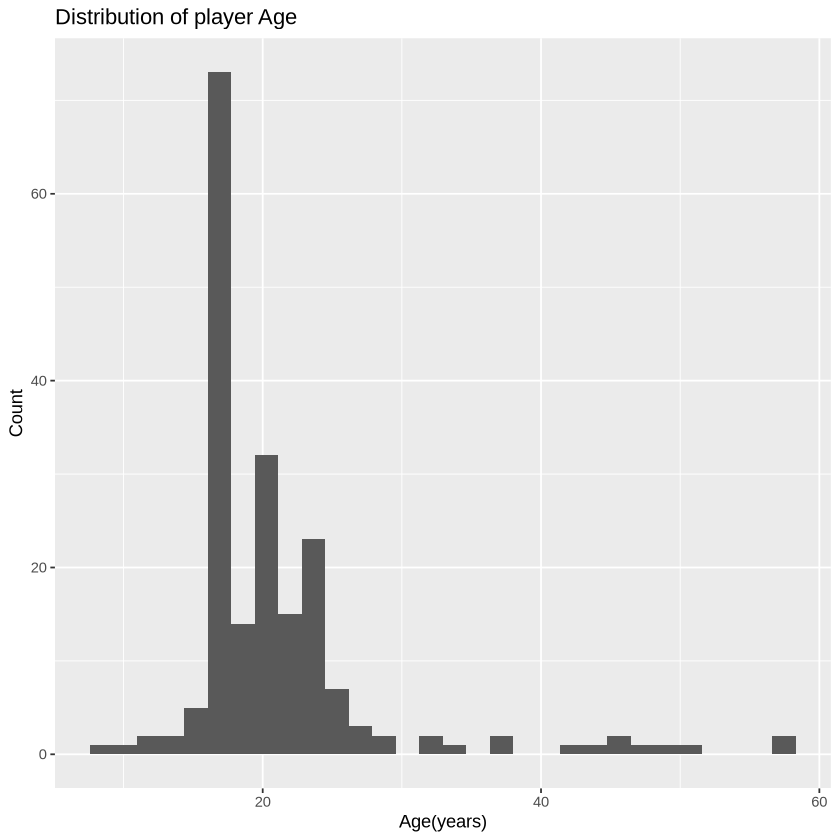

In [24]:
Age_distr <- ggplot(players_wrangling, aes(x = Age))+
geom_histogram()+
labs(title = "Distribution of Player Age", x = "Age(years)", y = "Count")
Age_distr

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


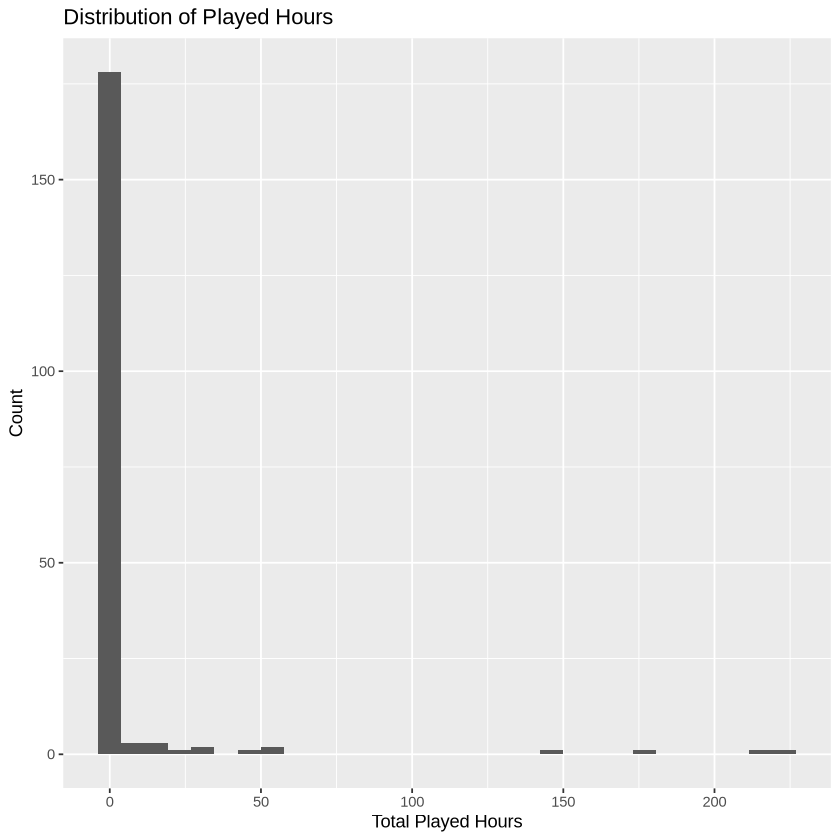

In [27]:
Played_hours_distr <- ggplot(players_wrangling, aes(x = played_hours))+
geom_histogram()+
labs(title = "Distribution of Played Hours", x = "Total Played Hours", y = "Count")
Played_hours_distr

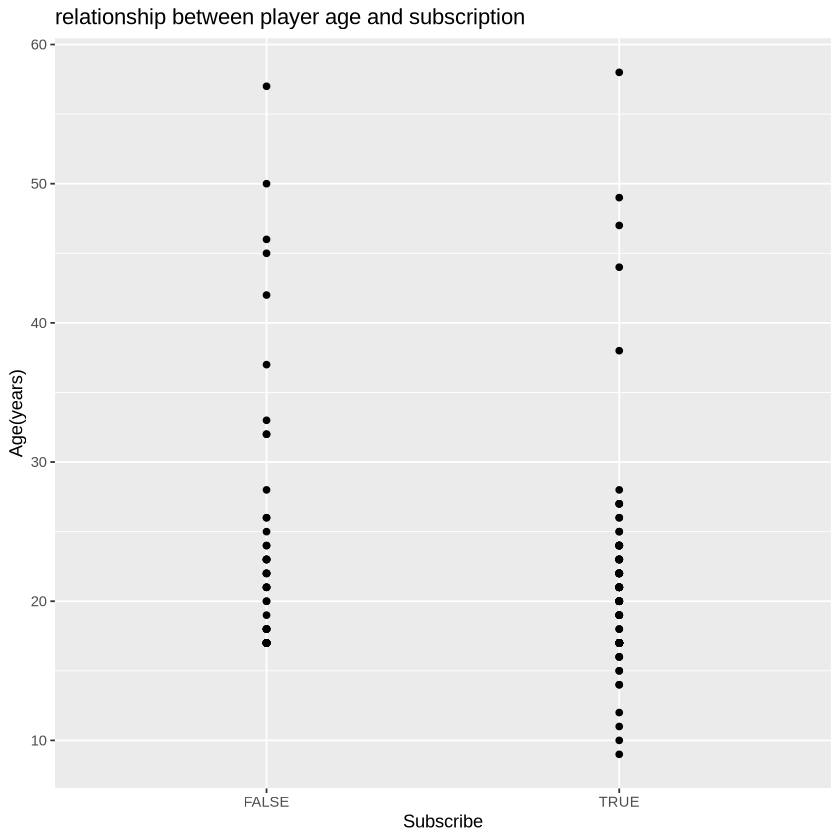

In [36]:
Age_sub <- ggplot(players_wrangling, aes(x = subscribe, y = Age))+
geom_point()+
labs(title = "relationship between player age and subscription", x = "Subscribe", y = "Age(years)")
Age_sub

subscribe,mean_hours
<fct>,<dbl>
FALSE,0.5019231
TRUE,7.8830986


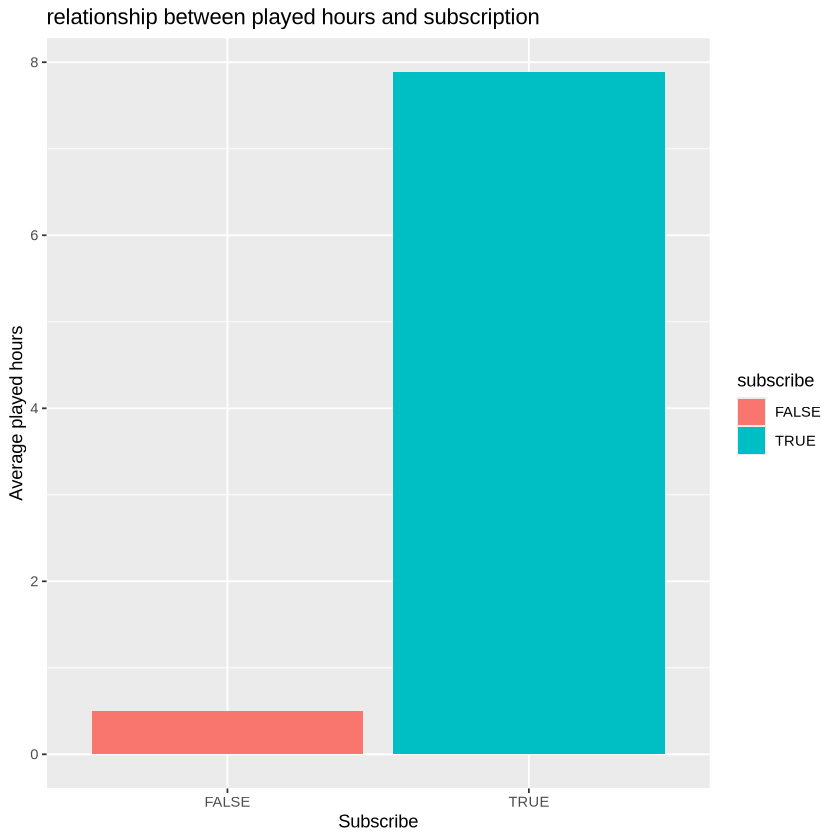

In [46]:
avg_hours_by_sub <- players_wrangling |>
  group_by(subscribe) |>
  summarise(mean_hours = mean(played_hours))
avg_hours_by_sub

Hours_sub <- ggplot(avg_hours_by_sub, aes(x = subscribe, y = mean_hours, fill = subscribe))+
geom_col()+
labs(title = "relationship between played hours and subscription", x = "Subscribe", y = "Average played hours")
Hours_sub

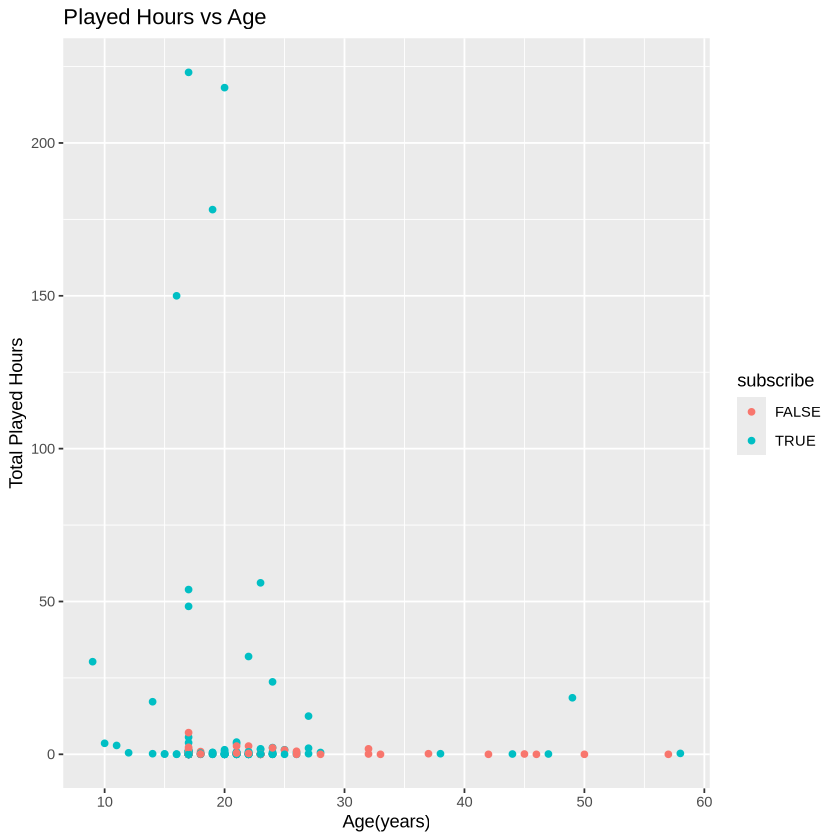

In [47]:
Hour_age_scatter <- ggplot(players_wrangling, aes(x = Age, y = played_hours, color = subscribe))+
geom_point()+
labs(title = "Played Hours vs Age", x = "Age(years)", y = "Total Played Hours")
Hour_age_scatter